## Linear Regression 

* A <b>supervised</b> learning model (meaning that it learns from labeled data) for predicting a <b>continuous valued output</b> - such as the price of houses (real numbers i.e. scalar values). 
* <b>Univariate (simple) linear regression</b> uses one independent variable to predict the output $\hat{y}$ (y_hat). 
* <b>Multiple linear regression</b> uses two or more independent variables to predict $\hat{y}$. 
* Using more variables allows the model to account for more factors that influence y and generally improve predictive accuracy. 


## Simple Linear Regression 

Model representaion (a straight line): $f_{w,b}$(x) = $w$x + $b$
<br><br>

* $f_{w,b}$(x) = hypothesis or model = a function that takes as input value of $x$ and tries to output the estimated value of $\hat{y}$ for the corresponding data (i.e. maps from x's to y's).
* $w, b$ = weights or coefficients or parameters of the model (adjusted as the model learns from data)
* $m$ = training examples = number of rows 
* $x$ = input variables or features (arranged in columns)  
* $y$ = output or target variable to be predicted (the true output in labeled data)
* $\hat{y}$ = predicted output (may be or may not be the true output value)
* $(x, y)$ or $(x^{(i)}, y^{(i)})$ = a single training example (the i-th training example) = a single row in a data table 


## Cost function 

$J(w,b) = \frac{1}{2m} \sum_{i=1}^{m} ( \hat{y}^{(i)} - y^{(i)} )^{2} = \frac{1}{2m} \sum_{i=1}^{m} ( f_{w,b}(x^{(i)}) - y^{(i)} )^{2} $ 
<br><br>
* Let us figure out how to fit the best possible model to our data, by minimizing the square difference between actual and expected outputs. 
* The "square difference" cost function is a reasonable choice and works well for most regression problems. There are other cost functions that would also work well, but this one is probably the most commonly used. 
* It is convex and always has a minima. 
* The error difference in $J(w,b)$ is squared for the function to increase rapidly as $w$ gets too small or too big.  
* With different choices of the parameters w and b, we get different hypothesis functions i.e. differeting fitting. 
* The algorithm used to minimize $J(w,b)$ (by following the gradients in all dimensions) is called "Gradient Descent" (it's used in many models, not only in regression). 
* Оn а 2D plot $J(w,b)$ looks like a parabole, while in 3D it resembles a "hammock" and can also be depicted as a countour plot of concentric elipses, where all points with the same $J$ form elipses and $min$ $J$ is in its center.



## Gradient desent

Repeat { $θ_{j}$ := $θ_{j}$ - $\alpha$ $\frac{\partial}{\partial θ_{j}}$J($θ$)  }

* Gradient descent involves repeated steps to adjust the value of parameters $w$ and $b$ to gradually get a smaller and smaller  cost $ J(w,b) $ 
* How to update $w$? By using the partial derivative of $J(w,b)$ with respect to $w$. It shows in which direction to take "baby steps down the hill".
<br><br>
$ w = w - \alpha \frac{d}{dw} J(w,b) $ &emsp;[1]
<br><br>
* Here $\alpha$ is our <b>learning rate</b> (how big of a step to take?). It controls how quickly we descend the slope of $J(w,b)$. Its value is typically around 0.01 or another small positive number between 0 and 1. 
* How to update $b$? By using the partial derivative of $J(w,b)$ with respect to $b$.<br><br>
$ b = b - \alpha \frac{d}{db} J(w,b) $ &emsp;[2]
<br><br> 
* We must repeat updating until convergence - i.e. until reaching such a local minima where $w$ and $b$ no longer change much with each additional step. Note that we <b>simultaneously</b> update both $w$ and $b$ to reach convergence (by using the "old" param' values form the previous step to calculate both).
* When training a nural network, we can have a more complex cost function (i.e. not "min squared error"), that has more than one minima. Gradient descent (GD) algorithm will work also in the case of minimizing a more complex function. The direction of the steepest descent should be taken at each step during the process. To chose a "staring point" for GD - initial values of w an b must be set. Depending on the starting point and the steps we take, we can find different "local minima".

## Learning rate and partial derivatives

* The partial derivative at A is the slope of the curve J, that touches J at point A.
* The terms "derivative" or "gradient" are interchangable in this context.
* When the slope is positive (>0), since $\alpha$ is also a positive number - $w$ is decreasing and we'll be moving to the "left" on our graph of $J(w,b)$.
* When the slope is negative (<0), then $w$ is increasing and the tangent line is slopping to the right i.s. has a negative slope.
* If $\alpha$ is chosen poorly - GD may not work at all.
** If $\alpha$ is too small - the "learning" speed is too slow as we take lots and lots of steps.
** If $\alpha$ is too big - GD may overshoot (fail to converge) and not find any minimum.
* What to do if we have found a local minima that is not the best solution (not a global minima)?
** We can reach a local minimum with a fixed learning rate.
** But we can also change the learning rate, based on how large is the partial derivative term at the point we are at.
** If it's large enough, then chose a bigger $\alpha$, otherwise chose smaller one.

<div style="text-align:center; font-size:10px">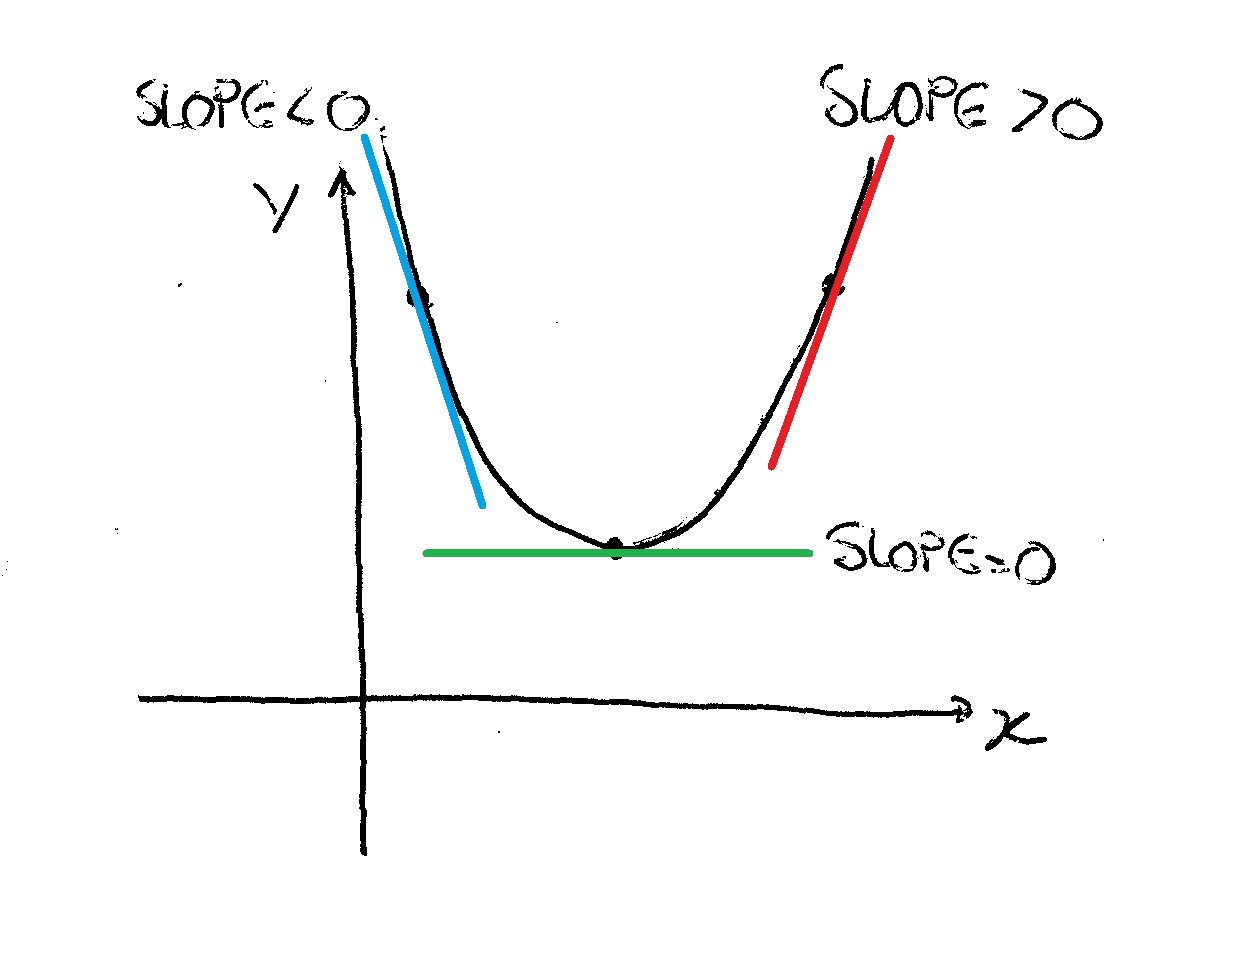 (CC) https://socratic.org/</div>

 
* How to calculate  partial derivatives for the update terms of $w$ and $b$? 
<br><br>
$ \frac{d}{dw} J(w,b) = \frac{1}{m} \sum_{i=1}^{m} ( f_{w,b}(x^{(i)}) - y^{(i)} ) x^{(i)}  $ &emsp; for [1]
<br><br>
$ \frac{d}{db} J(w,b) = \frac{1}{m} \sum_{i=1}^{m} ( f_{w,b}(x^{(i)}) - y^{(i)} )  $ &emsp;for [2]
<br><br>
p.s. This is why we use $\frac{1}{2}$ in the cost function - because it makes our partial derivative neater.<br>
* NB: The square error cost in linear regression does not have the problem of finding a local minima - as only one minima exists for our J(w,b). But with neural networks the cost function may not be in a "bow shape" i.e. be a beautiful convex function.
* For computing GD, we use a "batch" algorithm. Batch means that at each step of our algorithm we use all the data i.e. all training examples partecipate in the calculation fo each update of terms.

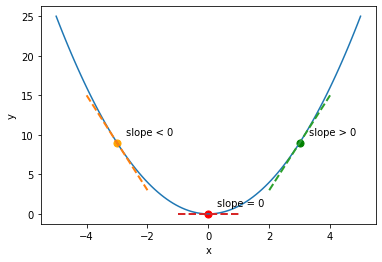

In [153]:
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline
 
def f(x): 
    '''Define parabola: y = x*x''' 
    return x**2
 
def slope(x):
    '''Define parabola derivative'''
    return 2*x
 
def line(x, x1,y1):
    '''Define tangent line: y = m*(x-x1) + y1'''
    return slope(x1)*(x - x1) + y1

# Points, x data range and colors to plot tangent lines
tx = [-3, 3, 0]
ty = [f(x1), f(x2), f(x3)]  
txrange = [np.linspace(i-1, i+1, 10) for i in tx] 
tcolors = ['orange', 'green', 'red']
tlabels = ['slope < 0', 'slope > 0', 'slope = 0']

# x data range for parabola
x = np.linspace(-5, 5, 100)
 
# Plot the figure
plt.figure()
plt.ylabel('y')
plt.xlabel('x')
plt.plot(x, f(x))
for i, c in enumerate(tcolors):
    plt.scatter(tx[i], ty[i], color=c, s=50) # 
    plt.plot(txrange[i], line(txrange[i], tx[i], ty[i]), '--', linewidth=2)
    plt.text(tx[i]+0.3, ty[i]+1, tlabels[i]) #chr(i+65)) 


### Exercise 1

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has restaurants in various cities and you have data for profits and populations from the cities. 
You would like to use this data to help you identify which cities may potentially give youre business higer profits.
The dataset contains two columns. The first one is the population of a city and the second one is the profit of a food restaurant in that city. A negative value for profit indicates a loss.

In [95]:
import math
import pandas as pd

data = pd.read_csv('./1_data.txt' , header = None) #read from dataset
data.head(5)

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [88]:
# Note: loc gets rows/columns with particular labels. iloc gets rows/columns at integer locations.
x_train = np.array(data.iloc[:,0]) # city population
y_train = np.array(data.iloc[:,1]) # average monthly profit 
print("Type and size of x_train: ", type(x_train), x_train.shape)
print("First five elements of x_train are: ", x_train[:5])
print("Type and size of y_train: ", type(y_train), y_train.shape)
print("First five elements of y_train are: ", y_train[:5])

Type and size of x_train:  <class 'numpy.ndarray'> (97,)
First five elements of x_train are:  [6.1101 5.5277 8.5186 7.0032 5.8598]
Type and size of y_train:  <class 'numpy.ndarray'> (97,)
First five elements of y_train are:  [17.592   9.1302 13.662  11.854   6.8233]


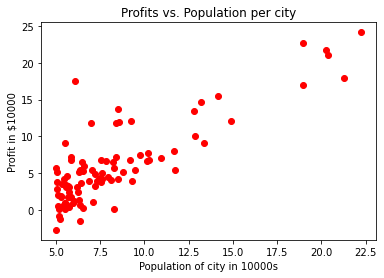

In [89]:
plt.scatter(x_train, y_train, marker='o', color='red')
plt.title("Profits vs. Population per city")
plt.ylabel("Profit in $10000")
plt.xlabel("Population of city in 10000s")
plt.show()

In [90]:
def compute_cost(x, y, w, b):
    '''
    Computes the cost function for linear regression.
    
    Args:
    x (ndarray): Shape (m,) Input to the model (Population of cities)
    y (ndarray): Shape (m,) Label (Actual profits/cities)
    w, b (scalar): Parameters of the model
    
    Returns:
    total_cost (float): The cost of using w and b as parameters for the model to fit x and y.    
    '''
    
    # number of training examples
    m = x.shape[0]
    
    total_cost = 0
    
    for i in range(m):
        total_cost += (w * x[i] + b - y[i])**2
        
    total_cost = total_cost / (2 * m)
    
    return total_cost

In [91]:
# Test
init_w = 2
init_b = 1
compute_cost(x_train, y_train, init_w, init_b)

75.20338497891959

In [92]:
def compute_gradient(x, y, w, b):
    '''
    Computes the gradient for linear regression.
    
    Args:
    x (ndarray): Shape (m,) Input to the model (Population of cities)
    y (ndarray): Shape (m,) Label (Actual profits/cities)
    w, b (scalar): Parameters of the model
    
    Returns:
    dj_dw (scalar): The gradient of the cost with respect to w
    fj_db (scalar): The gradient of the cost with respect to b    
    '''
    
    m = x.shape[0] # same as len(x)
    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        diff = w * x[i] + b - y[i]
        dj_dw += diff * x[i]
        dj_db += diff
        
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db 

In [93]:
# Test
init_w = 0
init_b = 0
dj_dw, dj_db = compute_gradient(x_train, y_train, init_w, init_b)
print("Gradient at (w, b) = (0, 0): ", dj_dw, dj_db)

init_w = 0.2
init_b = 0.2
dj_dw, dj_db = compute_gradient(x_train, y_train, init_w, init_b)
print("Gradient at (w, b) = (0, 0): ", dj_dw, dj_db)

Gradient at (w, b) = (0, 0):  -65.32884974555672 -5.83913505154639
Gradient at (w, b) = (0, 0):  -47.41610118114435 -4.007175051546391


In [130]:
def gradient_descent(x, y, w_in, b_in, cost_func, gradient_func, alpha, num_iters):
    '''
    Performs batch gradient descent to learn parameters w and b.  
    Updates parameters by taking num_iters gradient steps with learning rate alpha.
    
    Args:
    x (ndarray): Shape (m,) Input to the model (Population of cities)
    y (ndarray): Shape (m,) Label (Actual profits/cities)
    w_in, b_in (scalar): Initial values of parameters of the model
    cost_func: function to compute cost
    gradient_func: function to compute gradients
    alpha (float): Learning rate
    num_iters (int): number of iterations to run gradient descent
    
    Returns:
    w (scalar): Shape (1,) Updated value of parameter w of the model after running gradient descent
    b (scalar): Shape (1,) Updated value of parameter b of the model after running gradient descent 
    '''
 
    w = w_in
    b = b_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_func(x, y, w, b)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        cost = cost_func(x, y, w, b)
        
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i}: Cost = {cost:.2f}, w = {w}, b = {b}")
             
            
    return w, b

In [131]:
w_init = 0
b_init = 0
iters = 1500
alpha = 0.01

w, b = gradient_descent(x_train, y_train, w_init, b_init, compute_cost, compute_gradient, alpha, iters)
print(f"\nParams found by gradient descent: w = {w}, b = {b}")

Iteration 0: Cost = 6.74, w = 0.6532884974555673, b = 0.0583913505154639
Iteration 150: Cost = 5.31, w = 0.8888949164626273, b = -0.8683454409370605
Iteration 300: Cost = 4.96, w = 0.9610073805299465, b = -1.5861620466203947
Iteration 450: Cost = 4.76, w = 1.0160217015468063, b = -2.1337815696397477
Iteration 600: Cost = 4.64, w = 1.0579919151026862, b = -2.5515583939951316
Iteration 750: Cost = 4.57, w = 1.090010829330244, b = -2.8702787237710674
Iteration 900: Cost = 4.53, w = 1.114437935638548, b = -3.113429235456871
Iteration 1050: Cost = 4.51, w = 1.1330732809334128, b = -3.2989278240615976
Iteration 1200: Cost = 4.50, w = 1.147290114064432, b = -3.440443982657258
Iteration 1350: Cost = 4.49, w = 1.1581360812883905, b = -3.548406114845482

Params found by gradient descent: w = 1.166362350335582, b = -3.63029143940436


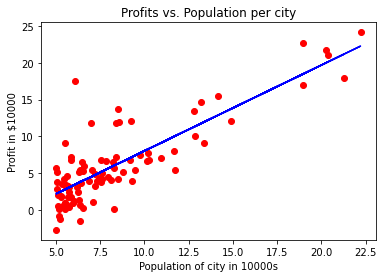

In [133]:
m = x_train.shape[0]
predicted = np.dot(w, x_train) + b 

plt.plot(x_train, predicted, color='blue')
plt.scatter(x_train, y_train, marker='o', color='red')
plt.title("Profits vs. Population per city")
plt.ylabel("Profit in $10000")
plt.xlabel("Population of city in 10000s")
plt.show()

In [147]:
# Using data on city population of cities that are candidates for new restaurants, predict revenue.
population = [3.5, 12.1, 7] # in 10000s

for p in population:
    predict = w * p + b
    print(f"The predicted monthly profit for a city with {p * 10000} citizen is ${predict * 10000:.2f}")

The predicted monthly profit for a city with 35000.0 citizen is $4519.77
The predicted monthly profit for a city with 121000.0 citizen is $104826.93
The predicted monthly profit for a city with 70000 citizen is $45342.45
